In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

from statsmodels.graphics.mosaicplot import mosaic

In [2]:
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [3]:
# 타이타닉 데이터
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 단변량 숫자

## 1. 숫자형

### 1) 기초 통계량

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2) 시각화

- boxplot
- 히스토그램
- 확률 밀도 함수

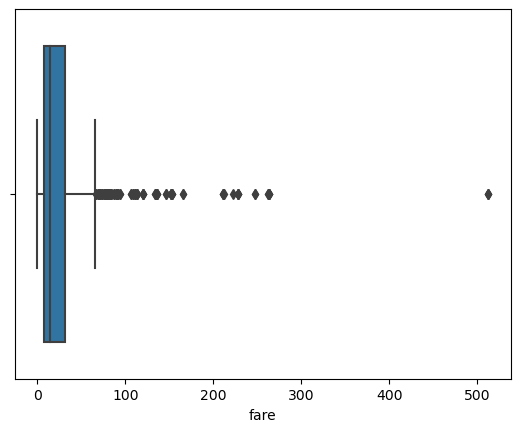

In [5]:
sns.boxplot(x = 'fare', data = titanic)
plt.show()

<AxesSubplot:xlabel='fare', ylabel='Count'>

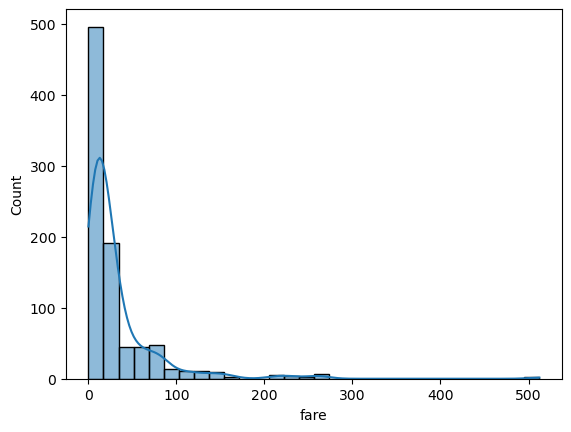

In [6]:
sns.histplot(x = 'fare', data= titanic, kde = True, bins = 30)

## 2. 범주형

### 1) 기초통계량


- 범주별 빈도수, 빈도율

In [7]:
print(titanic['survived'].value_counts())
print(titanic['survived'].value_counts()/titanic.shape[0])

0    549
1    342
Name: survived, dtype: int64
0    0.616162
1    0.383838
Name: survived, dtype: float64


### 2) 시각화

<AxesSubplot:xlabel='survived', ylabel='count'>

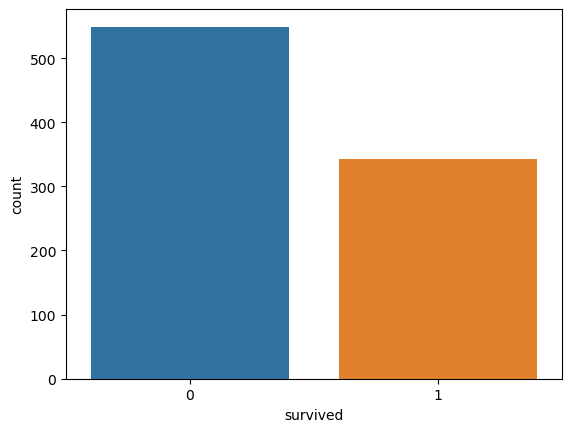

In [8]:
sns.countplot(x = 'survived', data=titanic)

# 이변량

## 1. 숫자 vs 숫자

In [9]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 1) 시각화

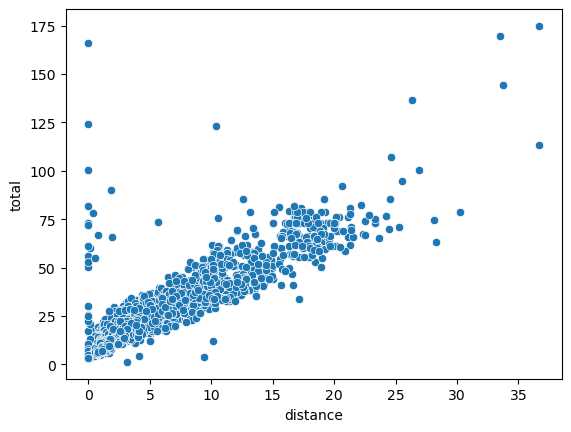

In [11]:
sns.scatterplot(x = 'distance', y = 'total', data = taxis)
plt.show()

### 2) 통계량

In [12]:
spst.pearsonr(taxis['distance'], taxis['total'])

PearsonRResult(statistic=0.9046764192201214, pvalue=0.0)

## 2. 범주(x) vs 숫자(y)

### 1) 시각화

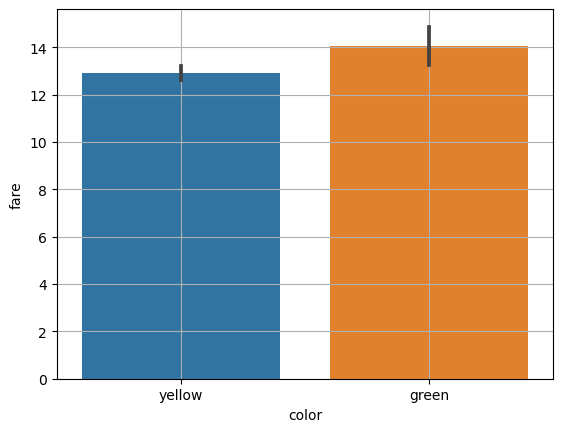

In [13]:
sns.barplot(x='color', y = 'fare', data = taxis)
plt.grid()
plt.show()

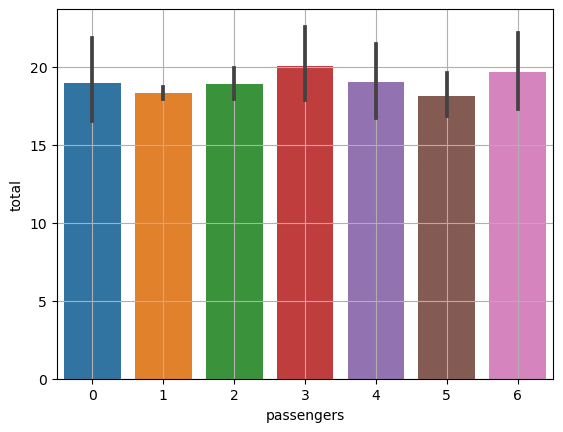

In [14]:
sns.barplot(x = 'passengers', y='total', data = taxis)
plt.grid()
plt.show()

### 2) 통계량

ⓐ 범주가 2개일때

In [15]:
yellow = taxis.loc[taxis['color'] == 'yellow']['total']
green = taxis.loc[taxis['color'] == 'green']['total']

In [16]:
spst.ttest_ind(green, yellow)

Ttest_indResult(statistic=-5.021817292148641, pvalue=5.256392692958145e-07)

ⓑ 범주가 3개 이상일 때

In [17]:
P_0 = taxis.loc[taxis['passengers'] == 0]['total']
P_1 = taxis.loc[taxis['passengers'] == 1]['total']
P_2 = taxis.loc[taxis['passengers'] == 2]['total']
P_3 = taxis.loc[taxis['passengers'] == 3]['total']
P_4 = taxis.loc[taxis['passengers'] == 4]['total']
P_5 = taxis.loc[taxis['passengers'] == 5]['total']
P_6 = taxis.loc[taxis['passengers'] == 6]['total']

In [18]:
spst.f_oneway(P_0, P_1, P_2, P_3, P_4, P_5, P_6)

F_onewayResult(statistic=1.0215924152074172, pvalue=0.40894626432227515)

## 3. 범주(x) vs 범주(y)TotalWorkingYears

- **교차표**

In [19]:
pd.crosstab(titanic['pclass'], titanic['survived'], normalize = 'index')

survived,0,1
pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


### 1) 시각화

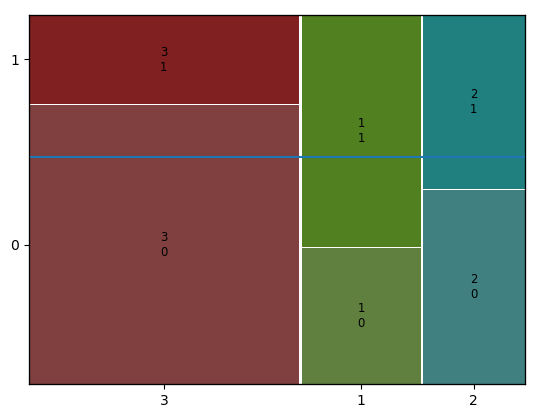

In [20]:
mosaic(titanic, ['pclass','survived'])
plt.axhline(1 - titanic['survived'].mean())
plt.show()

### 2) 통계량

In [21]:
table = pd.crosstab(titanic['pclass'], titanic['survived'])
spst.chi2_contingency(table)

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

## 숫자(x) vs 범주(y)

- **시각화**

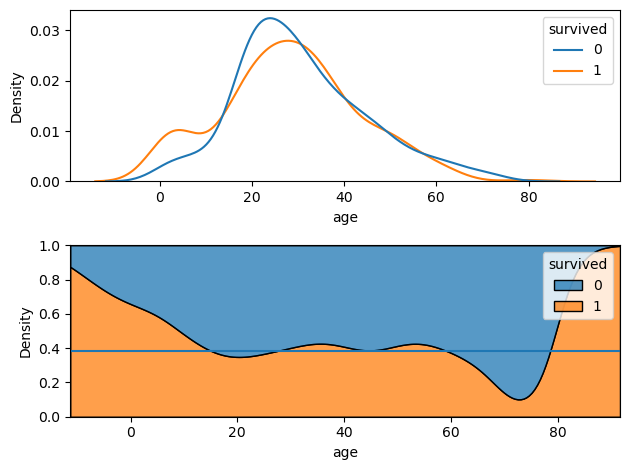

In [22]:
plt.subplot(2,1,1)
sns.kdeplot('age', hue='survived', data = titanic, common_norm = False)

plt.subplot(2,1,2)
sns.kdeplot('age', hue='survived', data = titanic, multiple = 'fill')
plt.axhline(titanic['survived'].mean())

plt.tight_layout()
plt.show()